## Tasks: Fundamentals of Data Analysis
### Course: HDip in Computing in Data Analytics
### Module:  Fundamentals of Data Analysis
### Lecturer: Ian McLoughlin
### Student: Sarah Hastings 

### Introduction 

This task for this project can be viewed in detail at the folowing link [tasks pdf](https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Ffundamentals%5Fof%5Fdata%5Fanalysis%2F0%5Fassessment%2F2324%5Fwinter%5Ffund%5Flist%5Fof%5Ftasks%2Epdf&parent=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Ffundamentals%5Fof%5Fdata%5Fanalysis%2F0%5Fassessment&ga=1)

The tasks include the following:

1. Collatz conjecture

2. Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.

3. For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

4. Suppose you are flipping two coins, each with a probability p of giving heads. Plot the entropy of the total number of heads versus p.

5. Create an appropriate individual plot for each of the variables in the penguin data set.5


### Importing Libraries

In [1]:
# Import pandas to allow for data analysis, manipulation
import pandas as pd
# Use Pyplot, part of the Matplotlib library to visualize the diagram/use for visual data/plots etc 
import matplotlib.pyplot as plt
# For working with numerical data, arrays
import numpy as np
# Importing seaborn gives a variety of visualization patterns in addition to matplotlib
import seaborn as sns
# Import entropy function from the scipy.stats module
from scipy.stats import entropy

### Task 1: Collatz conjecture

The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer, check if it's even or odd 2. If it's even divide it with two, else multiply it with 3 and add 1 to the result. When performed with any number indefinitely, at some point the result is reduced to 1 and you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .

For example, starting with the value 10, which is an even number, we divide it by 2 to get 5. Then 5 is an odd number so, we multiply by 3 and add 1 to get 16. Then we repeatedly divide by 2 to get 8, 4, 2, 1. Once we are at 1, we go back to 4 and get stuck in the repeating sequence 4, 2, 1 as we suspected.

Your task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

![collatzc](./data/collatzc.png)

The below code will ask the user to input any positive integer and outputs the successive values of the following calculation. At each step calculate the next value by taking the current value and, if it is even, divide it by two, but if it is odd, multiply it by three and add one. The program will end if the current value is one.

In [2]:
#Commented line below n allows user to enter a number, uncomment if needed
# n = int(input("Please enter a positive integer: "))
# Example value for testing purposes
n = 10  
# While loop will continue until n is 1 
while n !=1:                      
    print(n, end= ' ')
    # A number is even if division by 2 gives a remainder of 0 
    if n % 2 == 0:
        # To avoid decimal, use floor division with, this will always give a integer value
        n = n // 2                                          
    else:
        # Else is needed for odd numbers, where remainder is 1, multiply *3 +1
        n = (n * 3) + 1            
else:
        #end= ' ' allows you choose what you want to be printed after the print statement has been executed
        print(n, end= ' ')      

10 5 16 8 4 2 1 

The below code generates Collatz sequences for the specified range of positive integers from 1 to 10,000.
For each starting value, it checks if the last element of the generated sequence is not 1.
If a sequence does not reach 1, it prints a message indicating the starting value that doesn't reach 1.
If no such message is printed, it concludes that all positive integers less than 10,000 reach 1 in the Collatz sequence.

In [3]:
def collatz_sequence(n):
    # Initialize the sequence with the starting value
    sequence = [n]
    # Continue until the sequence reaches 1
    while n !=1:      
        # If the current number is even
        if n % 2 == 0: 
            # Update the number by dividing it by 2
            n = n // 2                                         
        else:
            # If the current number is odd, update it using the Collatz rule
            n = (n * 3) + 1 
        # Add the updated number to the sequence    
        sequence.append(n)
    # Return the completed Collatz sequence
    return sequence 
# Iterate through positive integers less than 10,000
for start_value in range(1, 10000):
    # Generate Collatz sequence for the current starting value
    sequence = collatz_sequence(start_value)

    # Check if the sequence doesn't end at 1
    if sequence[-1] != 1:
        print(f"Starting value {start_value} does not reach 1.")

# If no print statement is executed, all sequences reached 1
print("All positive integers less than 10,000 reach 1 in the Collatz sequence.")


All positive integers less than 10,000 reach 1 in the Collatz sequence.


## Task 2: Penguins data set overview & types of variables

> Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.


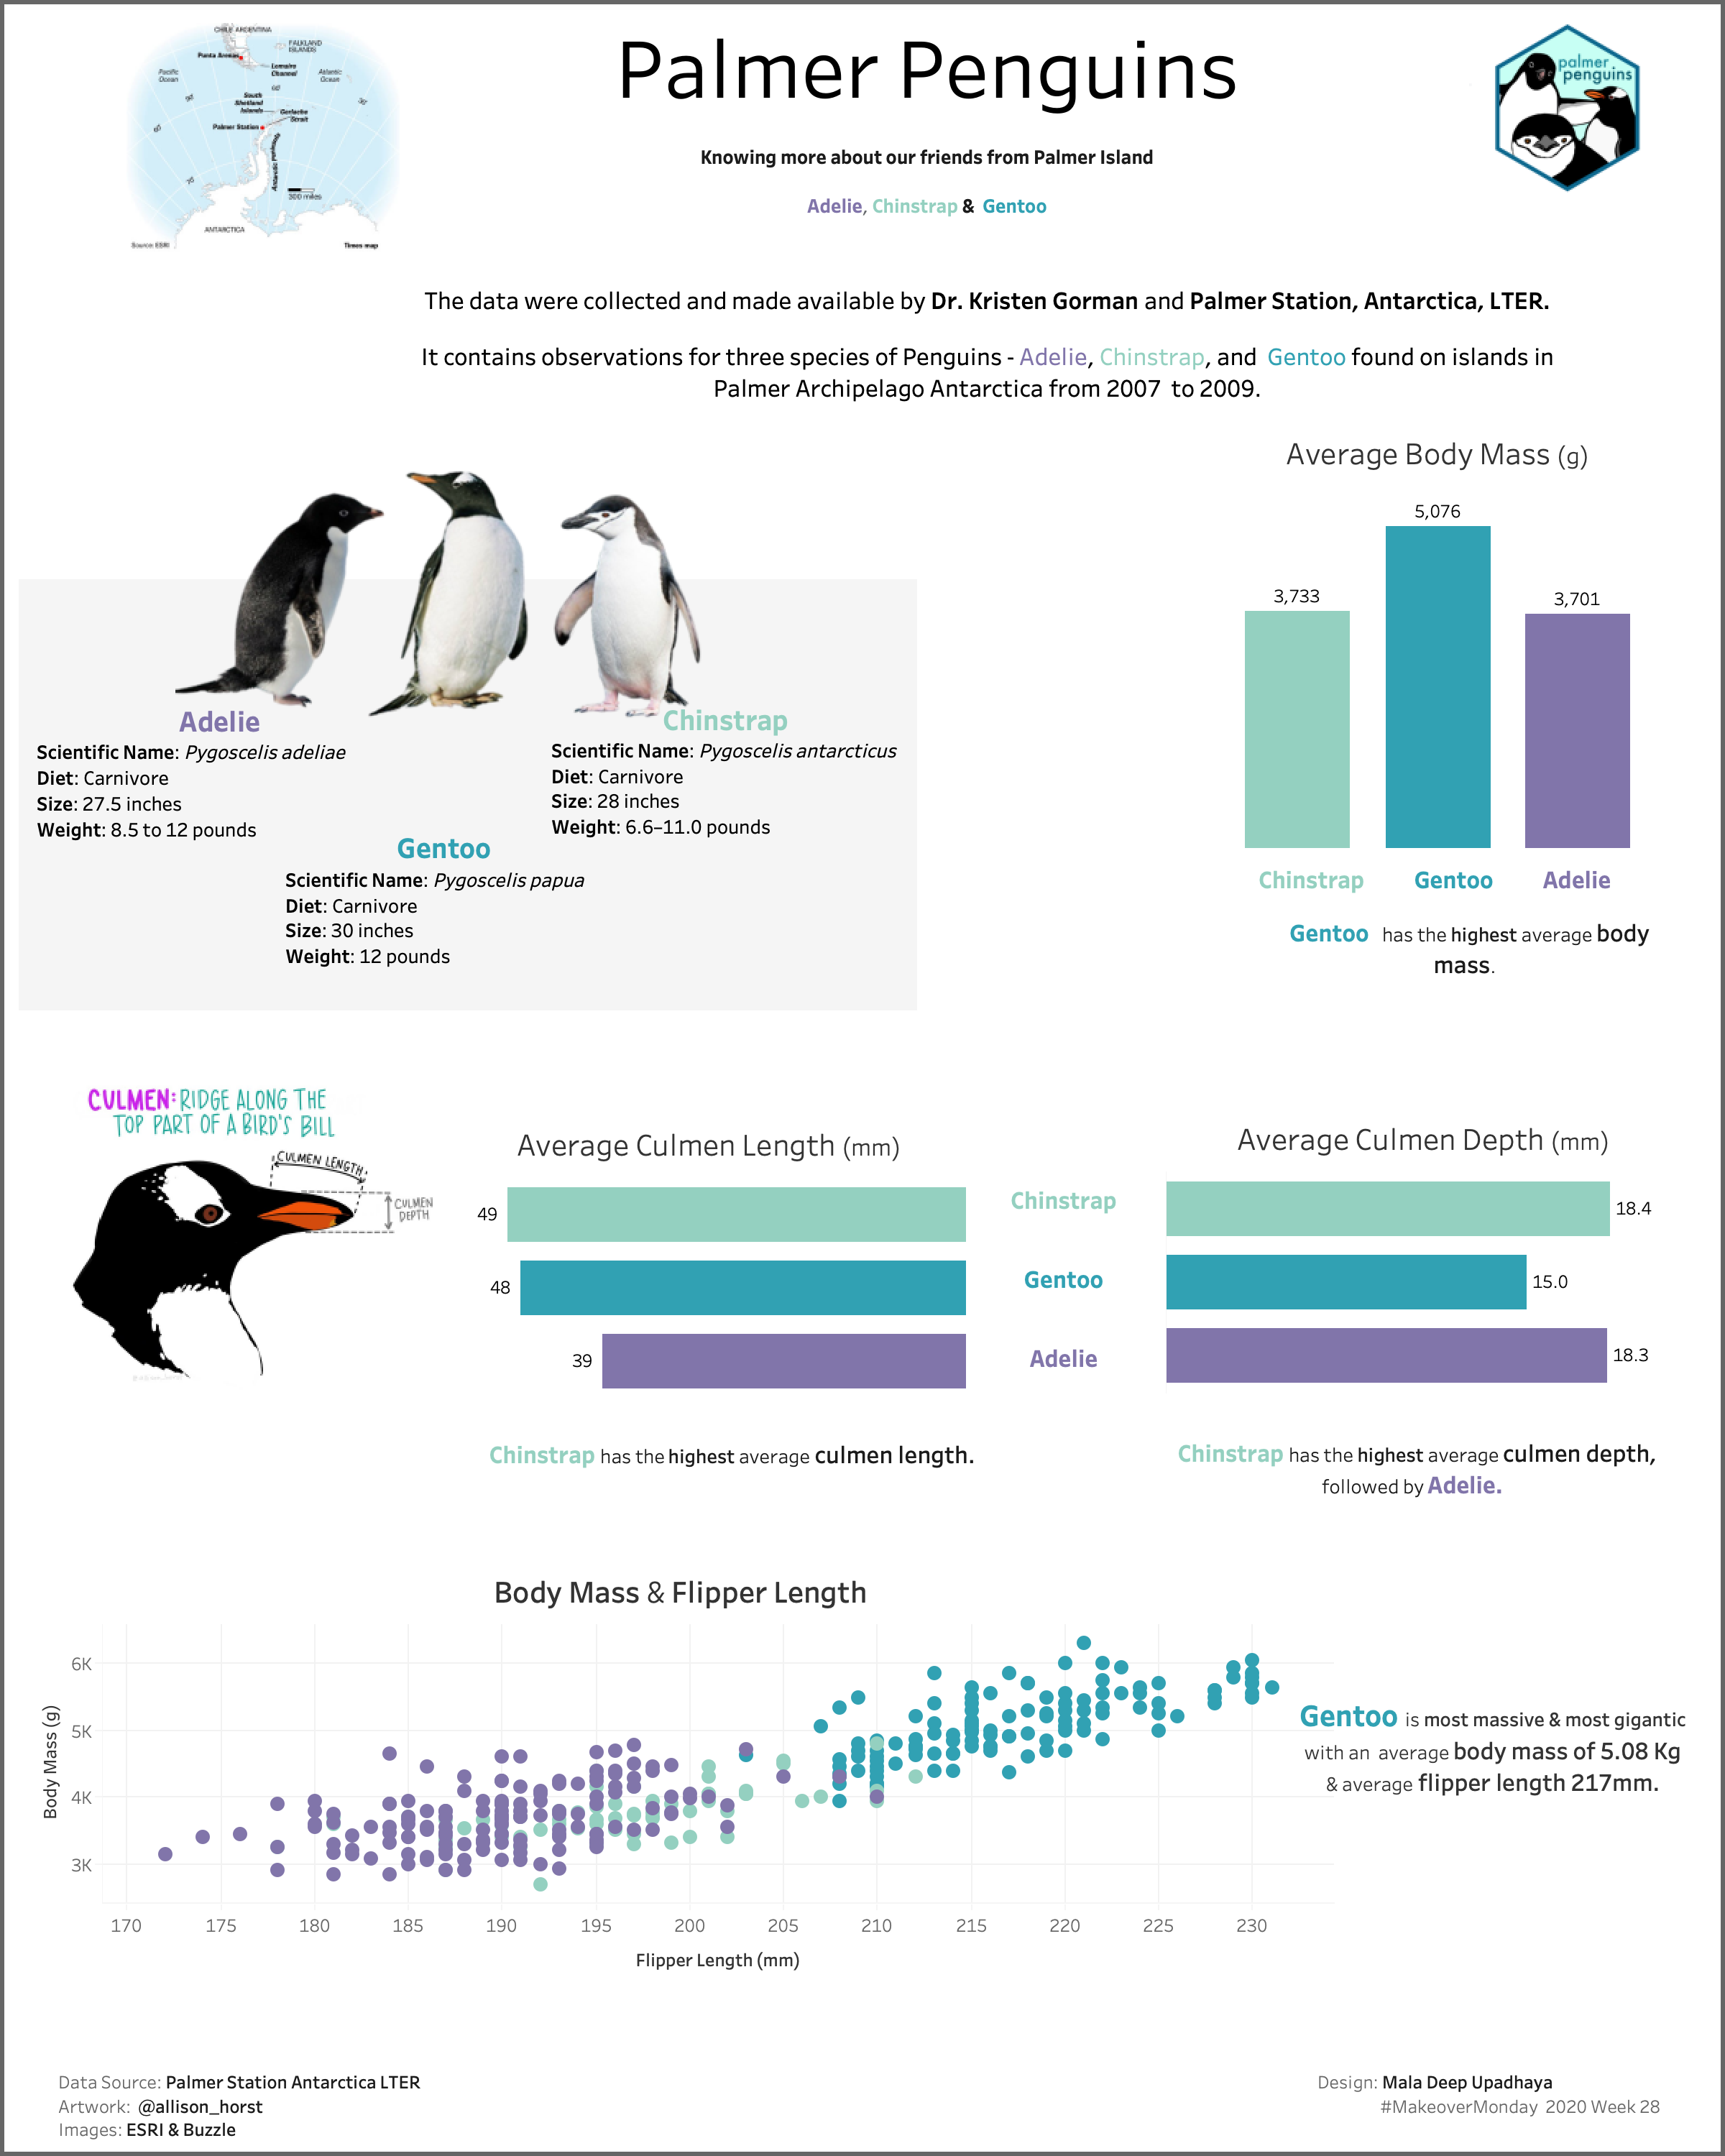

### Overview of the dataset

The above is a detailed summary of the Palmer Penguins Archipelago (Antarctica) dataset. This dataset is commonly used for data analysis, data exploration, visualization and machine learning and much more. It acts as an alternative to the Iris dataset.  

It contains information about various penguin species, including their physical measurements and characteristics. 
 
It is similiar to Iris in that is has 3 species, however, unlike Iris with classes of equal size, the penguins dataset classes are varied and imbalanced and add another good opportunity or additional advantage for learners exploring this dataset. The dataset also has missing values or data which add the exercise of data cleaning. 

⭕ Palmer Penguins Dataset

✅ Data Dimension/Size: 344 Rows and 7 Columns

✅ 7 Columns consists of 4 quantitative variables and 3 qualitative variables

✅ 4 quantitative variables: bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_g

✅ 3 qualitative variables: species, island and sex

✅ species (Adelie, Chinstrap and Gentoo)

✅ island (Biscoe, Dream and Torgersen)

✅ sex (male and female)

### Variables

Variables like "Species," "Island," and "Sex" are categorical, nominal, as they represent distinct categories or groups. The pandas library can be used to handle categorical variables, which allows for efficient storage and manipulation of the categorical data.

Numeric variables such as "Culmen Length," "Culmen Depth," "Flipper Length," and "Body Mass" are continuous variables. Numpy can be used for numerical operations, summary statistics and matplotlib or seaborn for data visualization of these types of variables. These can be used as input features for classification, such as regression or clustering algorithms, to gain insights and make predictions.

In [4]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the penguins dataset:")
print(penguins.head())

First few rows of the penguins dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [5]:
# Display information about the dataset including data types
print("\nInformation about the dataset:")
print(penguins.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [6]:
# Display summary statistics to get an overview of the numerical variables
print("\nSummary statistics of numerical variables:")
print(penguins.describe())


Summary statistics of numerical variables:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [7]:
# Explore categorical variables
print("\nUnique values in categorical variables:")
print("Species:", penguins['species'].unique())
print("Island:", penguins['island'].unique())
print("Sex:", penguins['sex'].unique())


Unique values in categorical variables:
Species: ['Adelie' 'Chinstrap' 'Gentoo']
Island: ['Torgersen' 'Biscoe' 'Dream']
Sex: ['Male' 'Female' nan]


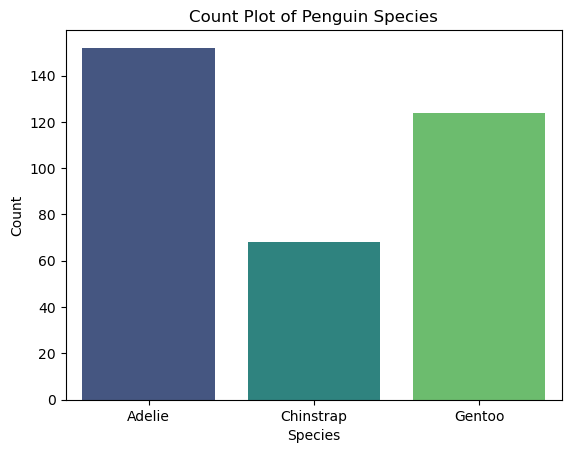

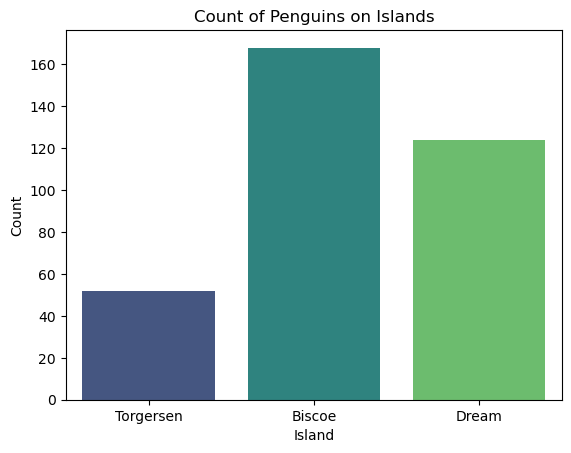

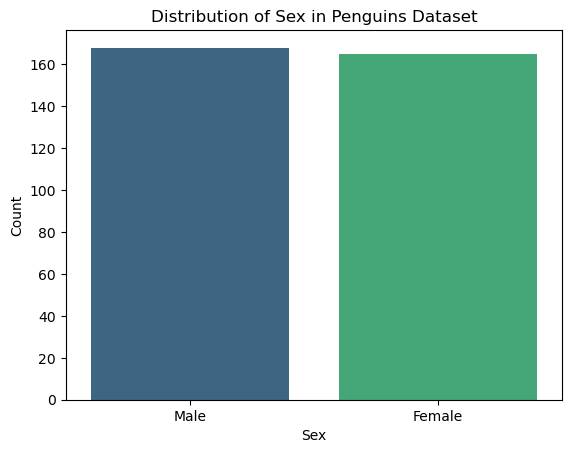

In [8]:
# Countplot for categorical variables
def plot_count(variable, title):
    sns.countplot(x=variable, data=penguins, palette='viridis')
    plt.title(title)
    plt.xlabel(variable.capitalize())  # Capitalize variable name for xlabel
    plt.ylabel('Count')
    plt.show()

# Count plot for species
plot_count('species', 'Count Plot of Penguin Species')

# Count plot for island
plot_count('island', 'Count of Penguins on Islands')

# Count plot for sex
plot_count('sex', 'Distribution of Sex in Penguins Dataset')


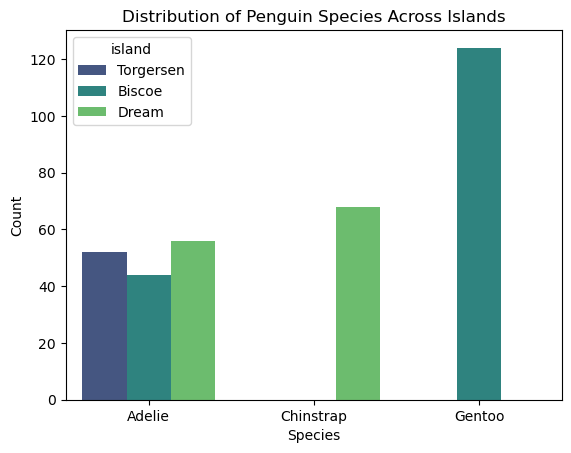

In [9]:
# Create a count plot for the 'species' variable, colored by 'island'
sns.countplot(x='species', hue='island', data=penguins, palette='viridis')

# Add labels and title
plt.title('Distribution of Penguin Species Across Islands')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

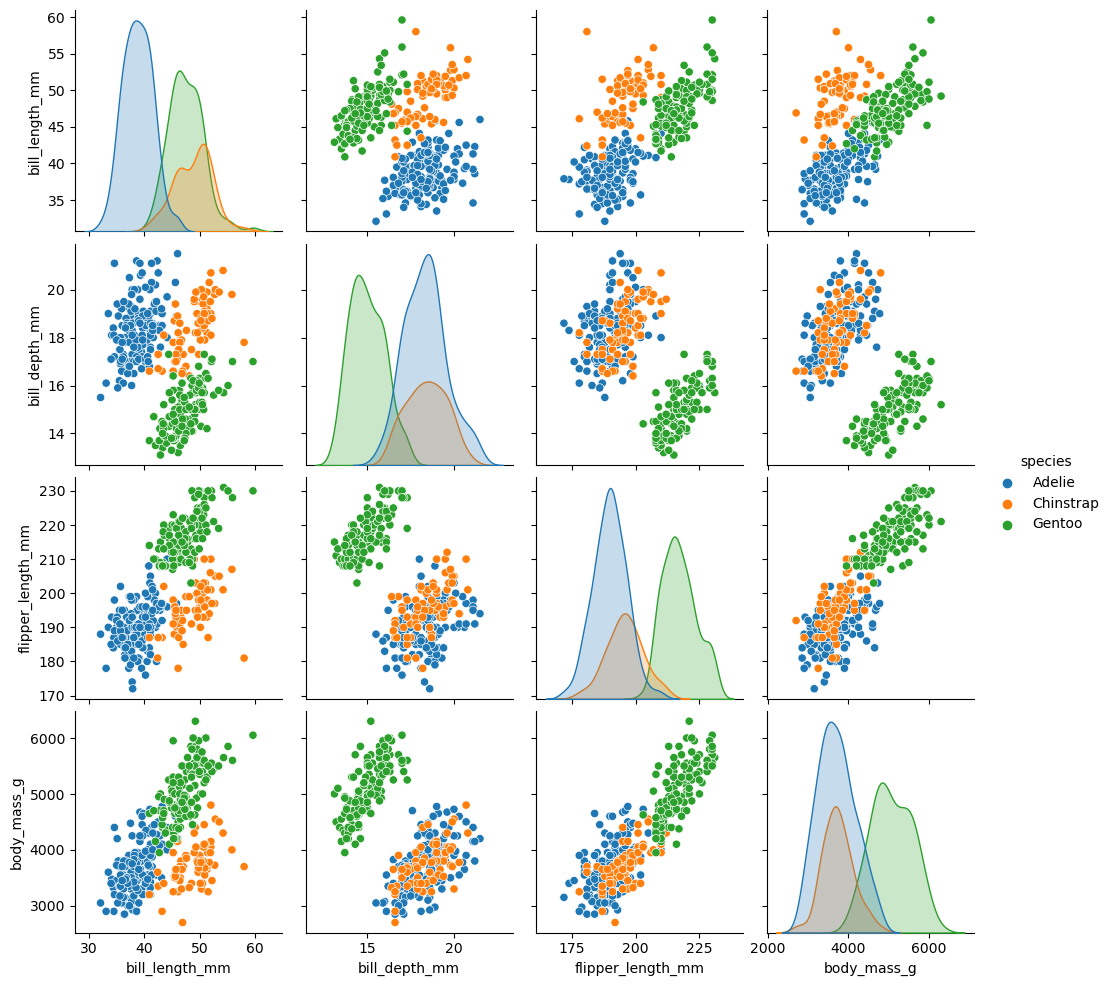

In [10]:
# Visualize the relationships between variables using pair plots
sns.pairplot(penguins, hue='species')
plt.show()

From the above you can see the different types of variables, how these can be modelled using the various python libraries for each type of variable and the observations that can be made from these. 

The Adelie species is present on all three islands, while Gentoo and Chinstrap species are found only on Biscoe and Dream islands. There are notable differences in body mass, flipper length, culmen length, and culmen depth across the penguin species. Gentoo has the highest average body mass and an average flipper length of 217mm, while chinstrap has the highest average culmen length and highest average culmen depth.

These insights provide an overview of the dataset, the distinctive characteristics of each penguin species and each of the variables which present opportunities for classification to gain insights and make predictions.

## Task 3: Penguins - probability distribution to model the variable

> For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

A probability distribution simply shows the probabilities of getting different outcomes. A discrete distribution is a distribution in which the values that the data can take on are countable, while a continuous distribution on the other hand is a distribution in which the values that the data can take on are not countable. Understanding how the variables are distributed is an important step of analysing the data. 

Techniques for distribution visualization can help determine the distribution and provide quick answers to many important questions such as what range do the observations cover?, what is their central tendency?, are they heavily skewed in one direction?

In NumPy, the random module offer methods that return randomly generated data distributions. These distributions are commonly used in statistical simulations and modeling. Each distribution function takes specific parameters that define the shape, scale, or other characteristics of the distribution, and it returns random samples following that distribution.

![Continuous distribution](./data/Continuous_distribution.jpg)

![Discrete distribution](./data/Discrete_distribution.jpg)

### Categorical variables - Species, Islands, Sex 
Both species and islands are categorical variables representing distinct categories of two or more possible outcomes can be treated as a discrete random variable with a multinomial distribution. Multinomial distribution is a generalization of binomial distribution, it describes outcomes of multi-nomial scenarios unlike binomial where scenarios must be only one of two. Whereas the sex variable is an example of a categorical nominal variable, the penguin can be either male or female, it is a binary variable, there is no ranking or ordering, in this case a binomial distribution can be used and also as there is almost an equal split between the sex in this dataset a uniform distribution can be used to describe probability. Below I will display an example of uniform and binomial distribution for the sex variable.

Simulated Sex Distribution (Uniform):
Female: 515 samples
Male: 485 samples


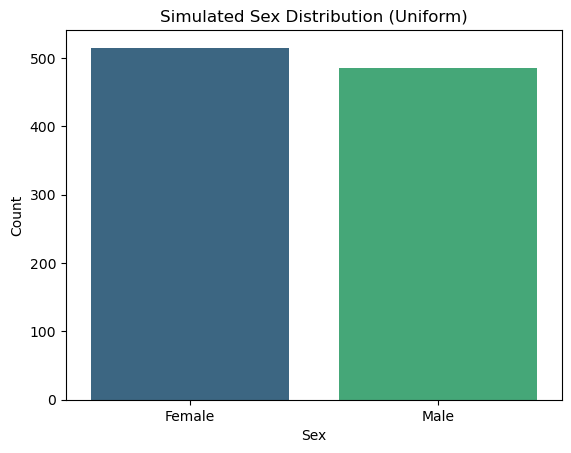

In [11]:
# Uniform distribution
# Set the number of trials (observations)
num_trials = 1000

# Simulate a uniform distribution
uniform_values = np.random.uniform(0, 1, num_trials)

# Map the continuous values to categories
sex_simulated = np.where(uniform_values < 0.5, 'Male', 'Female')

# Print the count of each category
sex_counts = pd.Series(sex_simulated).value_counts()
print(f"Simulated Sex Distribution (Uniform):")
print(f"Female: {sex_counts['Female']} samples")
print(f"Male: {sex_counts['Male']} samples")

# Create a countplot to visualize the distribution
sns.countplot(x=sex_simulated, palette='viridis')
plt.title("Simulated Sex Distribution (Uniform)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

Simulated Sex Distribution (Binomial):
Female: 494 samples
Male: 506 samples


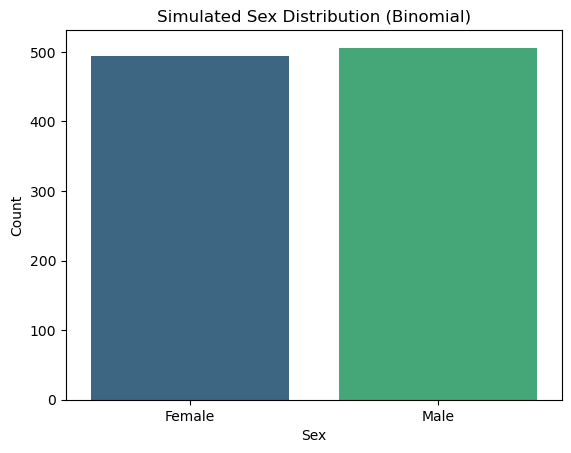

In [12]:
# Binomial distribution
# Number of samples
num_samples = 1000

# Probability of each category (Male or Female)
probability_male = 0.5  # Equal probability for Male and Female

# Simulate random samples from a binomial distribution
random_sex = np.random.binomial(n=1, p=probability_male, size=num_samples)
random_sex = np.where(random_sex == 1, "Male", "Female")

# Check the distribution
sex_counts = np.unique(random_sex, return_counts=True)
sex_distribution = dict(zip(sex_counts[0], sex_counts[1]))

# Print the distribution
print("Simulated Sex Distribution (Binomial):")
for category, count in sex_distribution.items():
    print(f"{category}: {count} samples")

# Plot the data
sns.countplot(x=random_sex, palette='viridis')
plt.title("Simulated Sex Distribution (Binomial)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

### Continuous Numeric variables 
Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm) and Body Mass (g) are all numeric continuous variables that could follow a normal (Gaussian) distribution, also known as the Bell Curve because of the bell-shaped curve. Using numpy.random.normal will all you to generate random samples from a normal distribution. Firstly I visualize the variables using a histogram to better understand the data, from these it appears the shape falls under the bell shape curve, while flipper length, bill length, bill depth may suggest a different distribution possibly bimodal. Bimodal can be used when two clearly separate groups are visible in a histogram, in the below example there are 2 peaks and more insights can be drawn from these. However, despite the presence of two peaks in flipper length, bill length, and bill depth histograms, the data near the mean is more frequent, indicating that a normal distribution might still be suitable for modeling these variables

I will display an example of this type of distribution using body mass using for visualisation. 

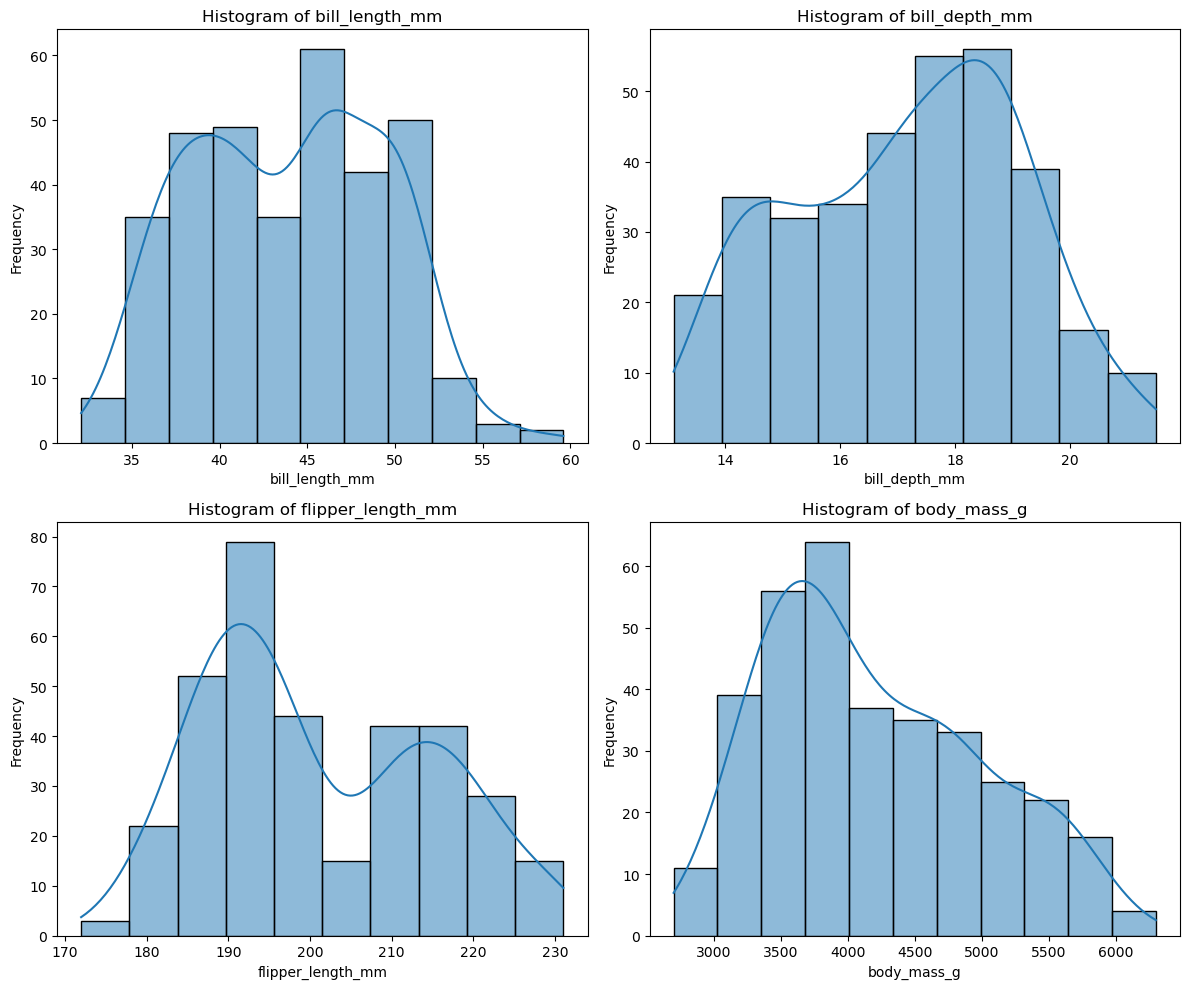

In [13]:
# Histogram of numerical variables
# Select numeric variables
numeric_variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Create histograms for each numeric variable
for i, variable in enumerate(numeric_variables):
    sns.histplot(penguins[variable], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

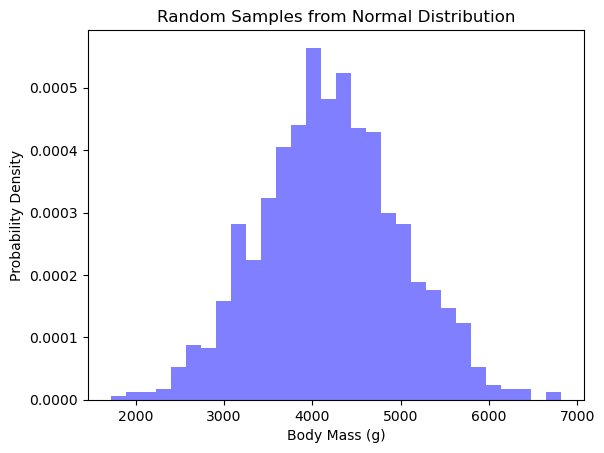

In [14]:
# Normal distribtuion example for body mass 
# Generate random samples for a variable with a normal distribution
mean_value = np.mean(penguins['body_mass_g'])
std_dev = np.std(penguins['body_mass_g'])

# Generate 1000 random samples
random_samples = np.random.normal(mean_value, std_dev, 1000)

# Plot the histogram of the random samples
plt.hist(random_samples, bins=30, density=True, alpha=0.5, color='blue')
plt.title('Random Samples from Normal Distribution')
plt.xlabel('Body Mass (g)')
plt.ylabel('Probability Density')
plt.show()

## Task 4

> Suppose you are flipping two coins, each with a probability p of giving heads. Plot the entropy of the total number of heads versus p. 

### Coin Toss

The below simulates flipping two coins and prints the number of heads obtained in those two flips, assuming a given probability of heads. The result can be 0 heads, 1 head, or 2 heads, representing the number of heads in the two coin flips, each coin has a x % chance of landing heads (success) and a x % chance of landing tails (failure). The result of this simulation is the number of heads obtained in the two coin flips.

The probability, p is a measure of how likely it is for the coin to land on heads in a single toss. If p=0.5, it means there is a 50% chance of getting heads in each coin flip, and tails have an equal probability. If p=0.3, it means there is a 30% chance of getting heads in each coin flip, and tails have a 70% chance.

In [15]:
# Coin flip function
def coinFlip(p):
    # Perform the binomial distribution (returns 0 or 1)
    result = np.random.binomial(1, p)
    # Return flip to be added to numpy array
    return result

# Probability of heads vs. tails. This can be changed.
probability = 0.5
# Number of flips required. This can be changed.
n = 2
# Initiate array
fullResults = np.arange(n)

# Perform the desired number of flips at the required probability set above
for i in range(0, n):
    fullResults[i] = coinFlip(probability)
    i += 1

# Print results
print("Probability is set to", probability)
print("Tails = 0, Heads = 1:", fullResults)

# Total up heads and tails for easy user experience
print("Head Count:", np.count_nonzero(fullResults == 1))
print("Tail Count:", np.count_nonzero(fullResults == 0))


Probability is set to 0.5
Tails = 0, Heads = 1: [0 0]
Head Count: 0
Tail Count: 2


### Entropy

Entropy is a measure of the disorder, uncertainty or randomness in a system. In statistics, it is used to measure the uncertainty or unpredictability in a set of data and to quantify the amount of information contained in a random variable. 

Scipy Stats provides a function called entropy, which can be used to calculate the entropy of a probability distribution.

The `entropy` function takes a probability distribution as input and returns its entropy value. The probability distribution can be represented using an array or a list of probabilities. The sum of all probabilities should be equal to 1.

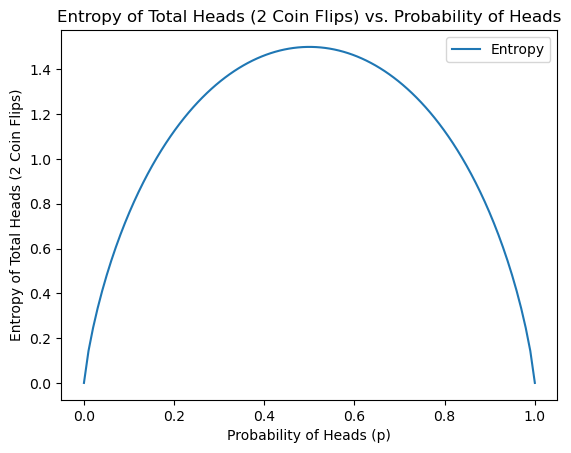

In [16]:
# Vary the probability of heads (p) from 0 to 1 with increments
p_values = np.linspace(0, 1, 100)

# Calculate entropy for each probability value (flipping two coins)
entropy_values = [entropy([p**2, 2*p*(1-p), (1-p)**2], base=2) for p in p_values]

# Plotting
plt.plot(p_values, entropy_values, label='Entropy')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Entropy of Total Heads (2 Coin Flips)')
plt.title('Entropy of Total Heads (2 Coin Flips) vs. Probability of Heads')
plt.legend()
plt.show()

## Task 5: Variable plots

> Create an appropriate individual plot for each of the variables in
the penguin data set

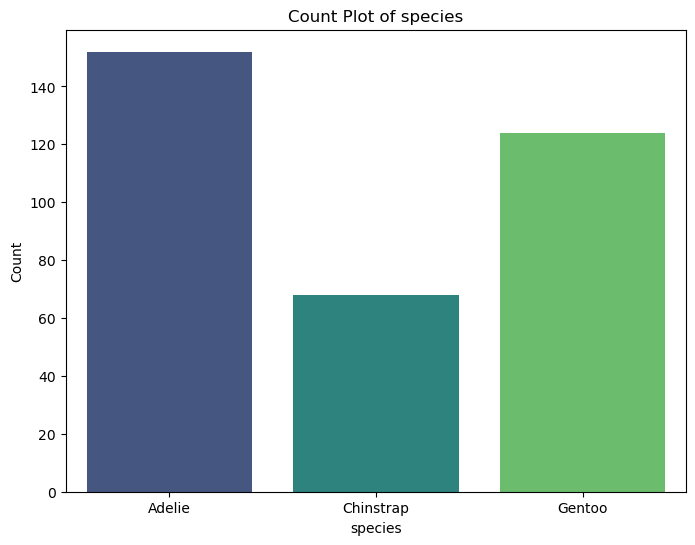

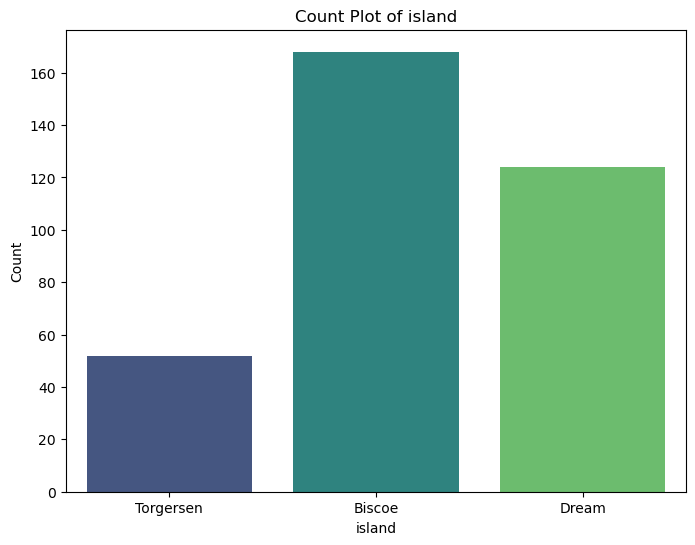

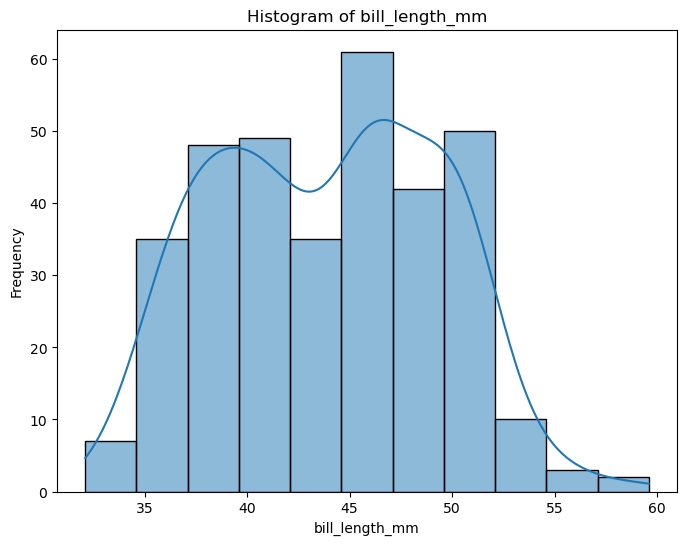

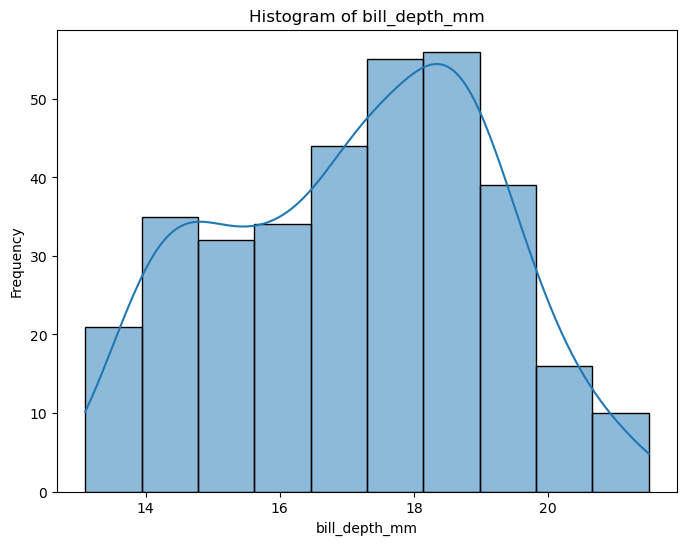

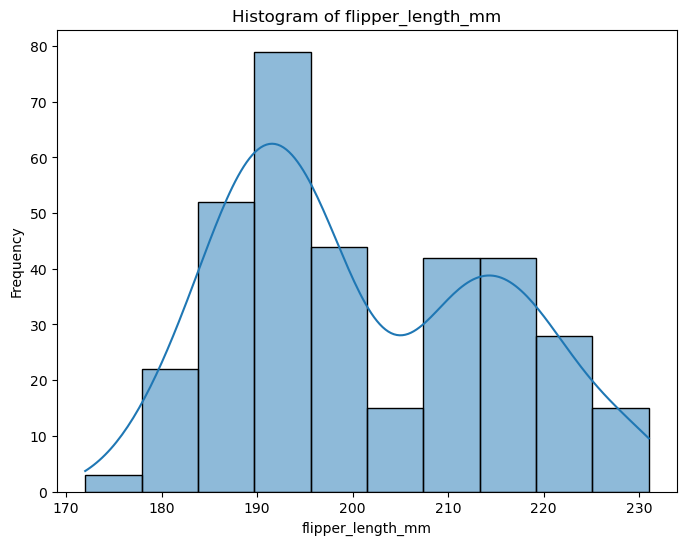

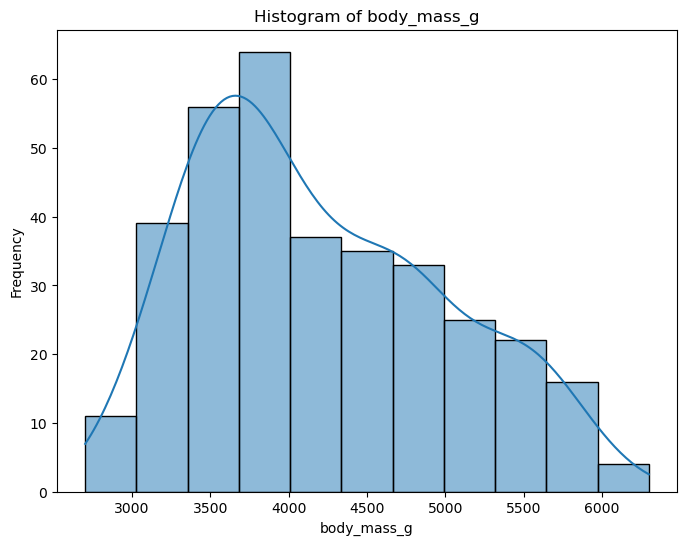

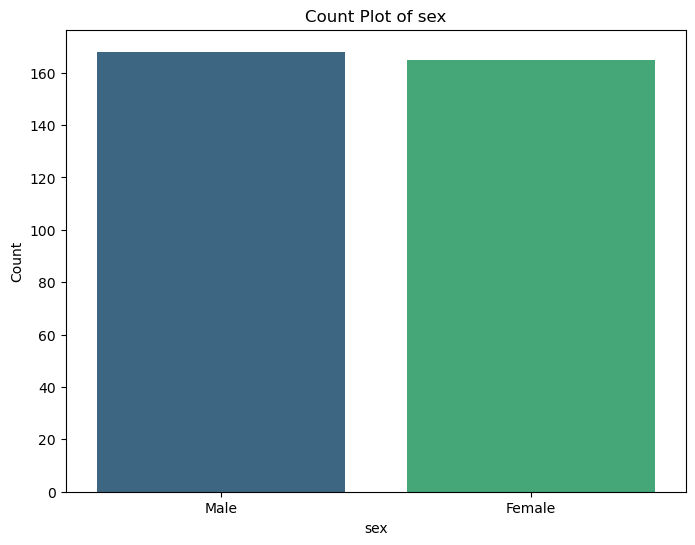

In [17]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Get the list of column names (variables)
variables = penguins.columns

# Create individual plots for each variable
for variable in variables:
    plt.figure(figsize=(8, 6))
    
    # Check the variable type and choose an appropriate plot
    if penguins[variable].dtype == 'float64' or penguins[variable].dtype == 'int64':
        # For numeric variables, create a histogram
        sns.histplot(penguins[variable], kde=True)
        plt.title(f'Histogram of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
    else:
        # For categorical variables, create a countplot
        sns.countplot(x=variable, data=penguins, palette='viridis')
        plt.title(f'Count Plot of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Count')

    plt.show()

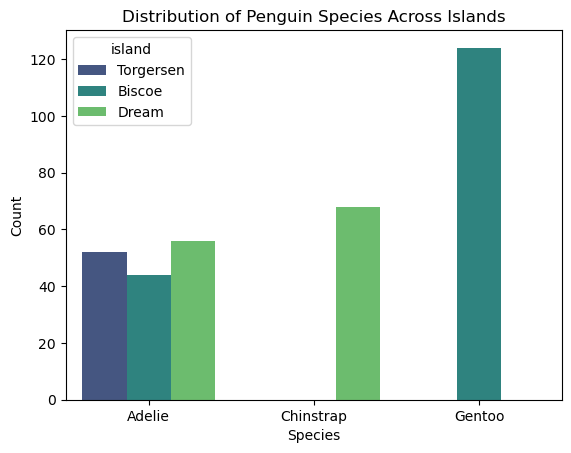

In [18]:
# Create a count plot for the 'species' variable, colored by 'island'
sns.countplot(x='species', hue='island', data=penguins, palette='viridis')

# Add labels and title
plt.title('Distribution of Penguin Species Across Islands')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

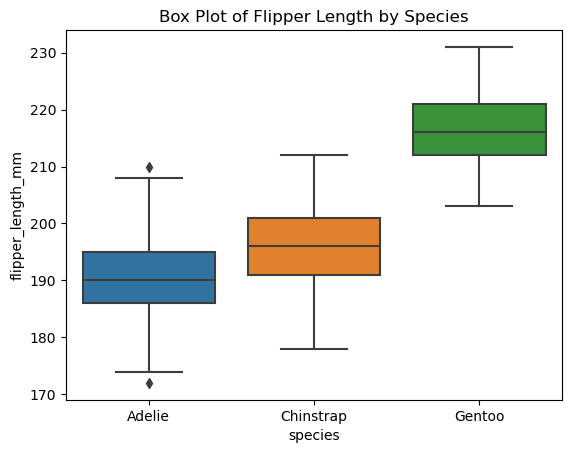

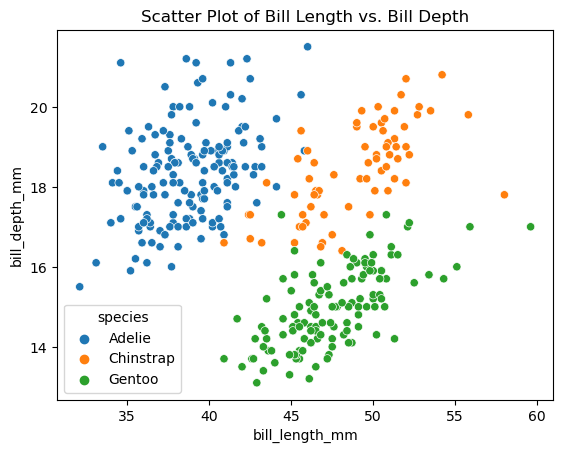

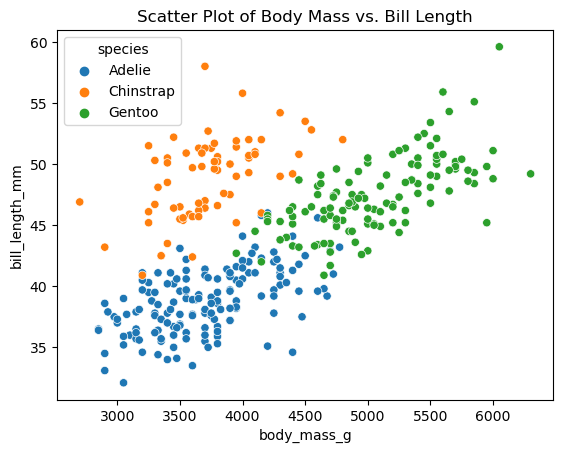

In [19]:
# Boxplot of flipper length across species 
sns.boxplot(x='species', y='flipper_length_mm', data=penguins)
plt.title('Box Plot of Flipper Length by Species')
plt.show()

# Scatterplot of numeric variables bill length, depth across species 
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.title('Scatter Plot of Bill Length vs. Bill Depth')
plt.show()

# Scatterplot of body mass across species
sns.scatterplot(x='body_mass_g', y='bill_length_mm', hue='species', data=penguins)
plt.title('Scatter Plot of Body Mass vs. Bill Length')
plt.show()


## References 

* https://pythonandr.com/2015/09/01/collatz-conjecture-what-you-need-to-know/
* https://data-flair.training/blogs/python-operator/  
* https://hackernoon.com/implementing-3x1-in-python
* https://github.com/HenkT28/pands-problem-set/blob/master/collatz.py 
* https://www.w3schools.com/python/ref_func_print.asp 
* https://towardsdatascience.com/all-probability-distributions-explained-in-six-minutes-fe57b1d49600
* https://www.w3schools.com/python/numpy/numpy_random_distribution.asp
* https://ugoproto.github.io/ugo_r_doc/pdf/probability.pdf
* https://pieriantraining.com/understanding-scipy-stats-entropy/#:~:text=The%20%60entropy%60%20function%20takes%20a,should%20be%20equal%20to%201.
* https://www.dummies.com/article/academics-the-arts/math/statistics/probability-for-dummies-cheat-sheet-208653/
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
* https://machinelearningmastery.com/what-is-information-entropy/
* [w3schools pandas cleaning data](https://www.w3schools.com/python/pandas/pandas_cleaning.asp)
* [Scikit-learn SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
* [Numpy distributions](https://numpy.org/doc/stable/reference/random/generator.html#distributions)
https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris
https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv
https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

***
#### End
***